In [138]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
import statistics 

In [139]:
module_roi = "../../05_30_2020/roi_measures_Module_ALL.csv"
line_roi = "../../05_30_2020/roi_measures_Line_ALL.csv"

df_module = pd.read_csv(module_roi)
df_line = pd.read_csv(line_roi)

df = df_module.join(df_line.set_index(c.PROJECT), on=c.PROJECT, rsuffix='_LINE')
roi_df = df[["Annualized_ROI", "Annualized_ROI_LINE"]]
roi_df.head()

,Annualized_ROI,Annualized_ROI_LINE
0,1.236,-0.63
1,2.022,7.90
2,0.124,-0.51
3,-0.624,-0.52
4,0.149,0.17


In [140]:
roi_df["ROI_MEAN"] = roi_df.mean(axis=1)
roi_df.head()

,Annualized_ROI,Annualized_ROI_LINE,ROI_MEAN
0,1.236,-0.63,0.3030
1,2.022,7.90,4.9610
2,0.124,-0.51,-0.1930
3,-0.624,-0.52,-0.5720
4,0.149,0.17,0.1595


In [141]:
df["ROI_MEAN"] = roi_df["ROI_MEAN"]

In [142]:
PROJECT_LIST = [
  "angular"
  ,"node"
  ,"neutron"
  ,"vue"
  ,"home-assistant"
  ,"tensorflow"
  ,"moby"
  ,"gitlabhq"
  ,"orleans"
  ,"roslyn"
  ,"ansible"
  ,"cli"
  ,"nova"
  ,"angular.js"
  ,"lock"
  ,"kubernetes"
  ,"mesos"
  ,"Odin"
  ,"nixpkgs"
  ,"react"
  ,"brew"
  ,"cinder"
  ,"elasticsearch"
  ,"linux"
  ,"cf-deployment"
  ,"office-js"
]


popular_projects = df[df[c.PROJECT].isin(PROJECT_LIST)]
len(popular_projects)

26

In [167]:
positive_roi = popular_projects[popular_projects["ROI_MEAN"] >= 0].sort_values(by="ROI_MEAN")
positive_roi.head(30)

,Project,Model,Amount_Invested,Amount_Returned,Investment_Gain,ROI,Annualized_ROI,Model_LINE,Amount_Invested_LINE,Amount_Returned_LINE,Investment_Gain_LINE,ROI_LINE,Annualized_ROI_LINE,ROI_MEAN
22,cf-deployment,Module,1237.97,3712.19,2474.22,1.999,0.442,Line,76990.51,2.620757e+04,-5.078294e+04,-0.66,-0.30,0.0710
7,gitlabhq,Module,1317.00,2950.94,1633.94,1.241,0.309,Line,55335.17,3.809658e+04,-1.723859e+04,-0.31,-0.12,0.0945
17,brew,Module,961.82,3261.00,2299.18,2.390,0.502,Line,16158.74,7.342340e+03,-8.816400e+03,-0.55,-0.23,0.1360
4,angular,Module,4125.56,6257.86,2132.30,0.517,0.149,Line,149536.47,2.383977e+05,8.886121e+04,0.59,0.17,0.1595
63,linux,Module,734.00,1102.64,368.64,0.502,0.145,Line,27489.00,8.358755e+04,5.609855e+04,2.04,0.45,0.2975
0,tensorflow,Module,1472.58,16458.81,14986.23,10.177,1.236,Line,3875011.52,1.889804e+05,-3.686031e+06,-0.95,-0.63,0.3030
13,angular.js,Module,16651.27,35665.72,19014.45,1.142,0.289,Line,956091.87,3.102689e+06,2.146597e+06,2.25,0.48,0.3845
9,roslyn,Module,9491.86,54241.44,44749.58,4.715,0.788,Line,292100.53,4.020457e+05,1.099451e+05,0.38,0.11,0.4490
6,home-assistant,Module,5304.82,199893.75,194588.93,36.682,2.353,Line,275884.47,4.338390e+06,4.062506e+06,14.73,1.51,1.9315
14,lock,Module,992.00,39252.00,38260.00,38.569,2.408,Line,15767.41,2.677600e+05,2.519926e+05,15.98,1.57,1.9890


In [144]:
percent_positive = len(positive_roi) /  len(popular_projects)
percent_positive

0.6153846153846154

In [148]:
print("Annualized ROI Mean: {0}".format(popular_projects["ROI_MEAN"].mean()))
print("Annualized ROI Min: {0}".format(popular_projects["ROI_MEAN"].min()))
print("Annualized ROI Max: {0}".format(popular_projects["ROI_MEAN"].max()))

Annualized ROI Mean: 0.8370384615384616
Annualized ROI Min: -0.5720000000000001
Annualized ROI Max: 4.961


Text(0, 0.5, 'Count')

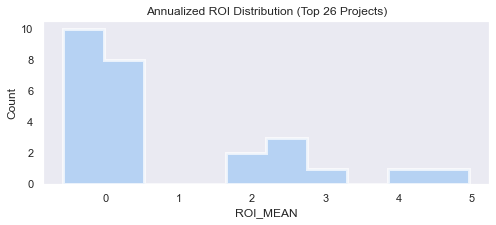

In [146]:
plt.figure(figsize=(8,3))
plt.tight_layout()

sb.set(style="dark", palette="pastel")
ax = sb.distplot(popular_projects["ROI_MEAN"], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3}, bins=10)
ax.set_title('Annualized ROI Distribution (Top 26 Projects)')
plt.ylabel("Count")

In [147]:
negative_roi = popular_projects[popular_projects["ROI_MEAN"] < 0].sort_values(by="Project")
negative_roi.head(13)

,Project,Model,Amount_Invested,Amount_Returned,Investment_Gain,ROI,Annualized_ROI,Model_LINE,Amount_Invested_LINE,Amount_Returned_LINE,Investment_Gain_LINE,ROI_LINE,Annualized_ROI_LINE,ROI_MEAN
34,Odin,Module,12680.00,4960.00,-7720.00,-0.609,-0.269,Line,482620.00,66080.00,-416540.00,-0.86,-0.48,-0.3745
10,cli,Module,9913.66,7155.35,-2758.31,-0.278,-0.103,Line,1472976.70,151956.98,-1321019.72,-0.90,-0.53,-0.3165
18,kubernetes,Module,24800.74,6247.64,-18553.10,-0.748,-0.368,Line,881144.27,865796.50,-15347.77,-0.02,-0.01,-0.1890
15,mesos,Module,24352.55,14008.98,-10343.57,-0.425,-0.168,Line,1061957.54,409553.06,-652404.48,-0.61,-0.27,-0.2190
3,moby,Module,2341.51,123.00,-2218.51,-0.947,-0.624,Line,68405.63,7749.00,-60656.63,-0.89,-0.52,-0.5720
20,nixpkgs,Module,195569.97,155182.84,-40387.13,-0.207,-0.074,Line,7554179.93,3534548.45,-4019631.48,-0.53,-0.22,-0.1470
5,node,Module,357768.47,116139.59,-241628.88,-0.675,-0.312,Line,26124292.75,6251409.85,-19872882.90,-0.76,-0.38,-0.3460
26,office-js,Module,17969.73,13304.00,-4665.73,-0.260,-0.095,Line,1359800.09,132124.00,-1227676.09,-0.90,-0.54,-0.3175
8,orleans,Module,9495.23,1262.24,-8232.99,-0.867,-0.490,Line,225863.63,12675.76,-213187.87,-0.94,-0.62,-0.5550
2,vue,Module,24161.72,34320.00,10158.28,0.420,0.124,Line,2692398.87,320320.00,-2372078.87,-0.88,-0.51,-0.1930
